In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense
from keras.models import Sequential, load_model
import glob, os, random

## Кусочек с прошлого ноутбука

In [2]:
base_path = './dataset-resized_back'
test_path = './MyRubbish_back'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))
train_datagen = ImageDataGenerator(
    rescale=1./225, shear_range=0.1, zoom_range=0.1,
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,
    vertical_flip=True, validation_split=0.1)

test_datagen = ImageDataGenerator(
    rescale=1./255, validation_split=0.9999)
    
train_generator = train_datagen.flow_from_directory(
    base_path, target_size=(300, 300), batch_size=16,
    class_mode='categorical', subset='training', seed=0)

validation_generator = test_datagen.flow_from_directory(
    test_path, target_size=(300, 300), batch_size=16,
    subset='validation', class_mode='categorical',  seed=0)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())


Found 2268 images belonging to 6 classes.
Found 16 images belonging to 6 classes.


In [3]:
validation_generator = test_datagen.flow_from_directory(
    test_path, target_size=(300, 300), batch_size=16,
    subset='validation', class_mode='categorical',  seed=0)


Found 16 images belonging to 6 classes.


## Подгружаем модель

In [11]:
model = load_model('my_model.h5')


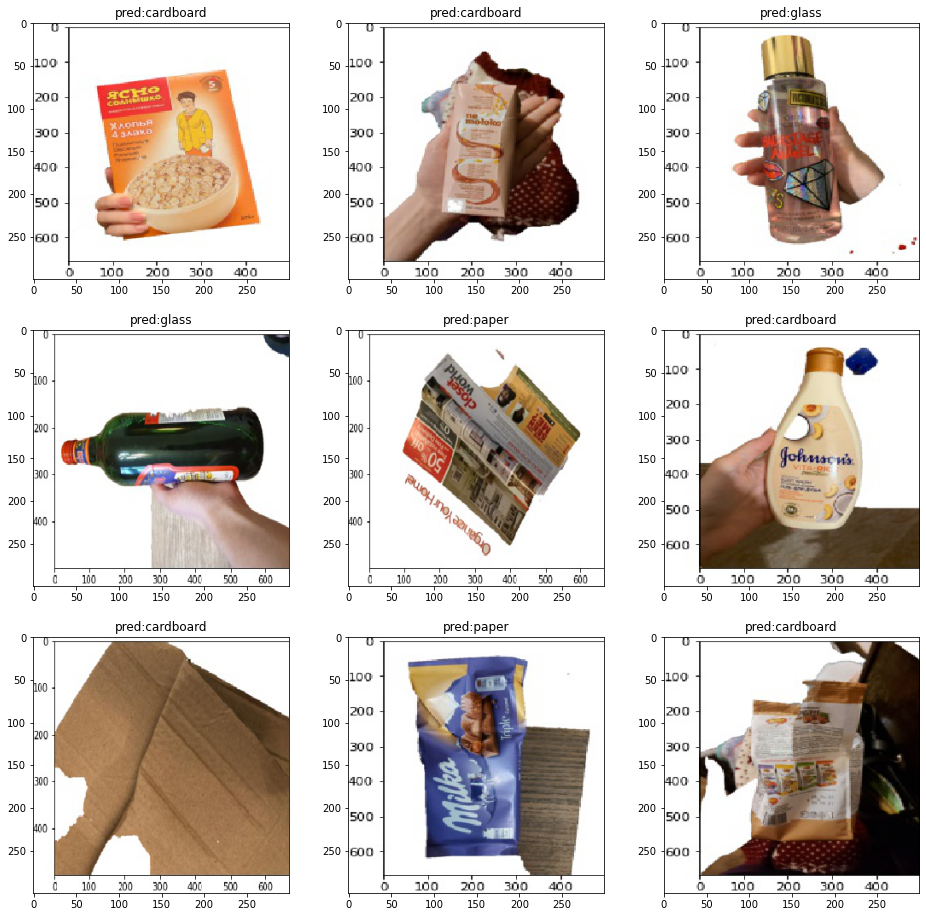

In [13]:
test_x, test_y = validation_generator.__getitem__(0)

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
action = [2, 4, 5, 6, 7, 9, 11, 13, 14]
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.title('pred:%s' % (labels[np.argmax(preds[action[i]])]))
    plt.imshow(test_x[action[i]])